# Concepts in Artificial Intelligence & Machine Learning Assignment 2

## Tasks
Your task is to build a regression model to predict the sales price for each house. The provided dataset includes 38 features of the houses and their corresponding house prices (Please refer to section 3 for a detailed description). You are free to choose the regression models. Specifically, the tasks you need to complete are:

1. There are missing values in the provided dataset for both training and test set. Will the missing values affect the model training? How do you solve the issue? Do research on the possible solutions, choose two solutions and justify the reason you choose them. Write your own code to apply the two solutions and compare the regression model’s performances on the datasets that apply the two solutions. Section 5 gives reference about handling missing values. (6 Marks)

2. Write Python code to build a regression model from the training set that you applied the better solution in (1). Write the code to evaluate its performance on the test set that you applied the better solution in (1) with Root-Mean-Squared-Error (RMSE). RMSE shares similar motivation of the least square loss we taught in the lecture. Section 5 gives reference for the definition. Please try at least two regression models and compare their performances. (6 Marks)

3. There are 38 features provided for each house. Are all of the features used in your regression models? What’s the impact if removing some features? Please write your own code to compare different feature selections and justify your selection. At least two feature selections are investigated (full feature set, a subset of the features). The dataset is the modified ones that you applied the better solution in (1). (6 Marks)

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

import numpy as np

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Required packages

1. sys
2. sklearn
3. pandas
4. numpy
5. matplotlib
6. seaborn

### How to run the code
1. Put the jupyter notebook (a1816871_assignment2.ipynb) with the same level with folder "assignment 2 data"
2. Run

Details in requirement.txt

## Task 1:
There are missing values in the provided dataset for both training and test set. Will the missing values affect the model training? How do you solve the issue? Do research on the possible solutions, choose two solutions and justify the reason you choose them. Write your own code to apply the two solutions and compare the regression model’s performances on the datasets that apply the two solutions. Section 5 gives reference about handling missing values.

### 1.1. Will the missing values affect the model training?
The training of the model, especially the regression model, will be significantly impacted by missing values. Incomplete data might decrease the precision of statistical analysis. If missing data are not handled effectively, a biassed machine learning model may be developed, leading to inaccurate results.

### 1.2. How do you solve the issue?
There are 2 primary ways of solving missing values:

1. Deleting the missing values
2. Imputing the missing values

### 1.3. Do research on the possible solutions, choose two solutions and justify the reason you choose them

In [2]:
# Load the data set from the csv file into a dataframe
training_set = pd.read_csv("assignment 2 data/train.csv")
test_set = pd.read_csv("assignment 2 data/test.csv")

# There are no empty records in the dataset, the missing value just appears as the Missing string
# Filter data set with missing values
missing_value_training_df = training_set[(training_set.iloc[:,:] == "Missing").any(axis=1)]
missing_value_test_df = test_set[(test_set.iloc[:,:] == "Missing").any(axis=1)]

# Print number of rows
print(f"Number of rows which have missing values in training set: {missing_value_training_df.shape[0]}")
print(f"Number of rows which have missing values in test set: {missing_value_test_df.shape[0]}")

# Calculate the ratio of missing values in the data set
print(f"Ratio of records which have missing values in training set: {100*round(missing_value_training_df.shape[0]/training_set.shape[0], 3)} %")
print(f"Ratio of records which have missing values in test set: {100*round(missing_value_test_df.shape[0]/test_set.shape[0], 3)} %")

# Display missing values
display(missing_value_training_df)
#display(missing_value_test_df)

Number of rows which have missing values in training set: 66
Number of rows which have missing values in test set: 15
Ratio of records which have missing values in training set: 5.7 %
Ratio of records which have missing values in test set: 5.1 %


,ID,MSSubClass,LotArea,Street,HouseStyle,ExterQual,BldgType,LotConfig,OverallQual,OverallCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
13,14,20,10652,Pave,1Story,Gd,1Fam,Inside,Missing,5,...,160,33,0,0,0,0,0,8,2007,279500
15,16,45,6120,Pave,1.5Unf,TA,1Fam,Corner,7,8,...,48,112,0,0,0,0,0,7,2007,132000
35,36,60,13418,Pave,2Story,Gd,1Fam,Inside,Missing,5,...,113,32,0,0,0,0,0,9,2006,309000
47,48,20,11096,Pave,1Story,Gd,1Fam,Inside,Missing,5,...,0,146,0,0,0,0,0,7,2007,249700
50,51,60,13869,Pave,2Story,TA,1Fam,Corner,6,6,...,0,75,0,0,0,0,0,7,2007,177000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1092,160,2160,Pave,2Story,Gd,Twnhs,Inside,7,Missing,...,0,48,0,0,0,0,0,3,2008,160000
1121,1122,20,10084,Pave,1Story,Gd,1Fam,Inside,7,Missing,...,144,20,0,0,0,0,0,7,2006,212900
1123,1124,20,9405,Pave,1Story,TA,1Fam,Inside,Missing,9,...,0,200,0,0,0,0,0,6,2009,118000
1133,1134,60,9828,Pave,2Story,Gd,1Fam,Inside,8,Missing,...,0,155,0,0,0,0,0,6,2009,239500


In [3]:
# Convert datatype of YearBuilt, OverallQual and OverallCond from object to numeric
# List columns to convert
cols = ['YearBuilt', 'OverallQual', 'OverallCond']

# Convert datatype in training set
training_set[cols] = training_set[cols].apply(pd.to_numeric, errors='coerce', axis=1)

# Convert datatype in test set
test_set[cols] = test_set[cols].apply(pd.to_numeric, errors='coerce', axis=1)

# Show difference between overall quality and overall condition
difference_overall_qual_and_cond = abs(training_set['OverallQual'] - training_set['OverallCond'])
difference_overall_qual_and_cond.value_counts().rename_axis('Difference between OverallQual and OverallCond').reset_index(name='Number of records')

,Difference between OverallQual and OverallCond,Number of records
0,1.0,371
1,2.0,331
2,0.0,205
3,3.0,160
4,4.0,40
5,5.0,10
6,7.0,1


The characteristics of missing values in the data set are as follows:
1. There are three features that have missing value problems: OverallQual, OverallCond, YearBuilt. All of these features are available as numeric data types.
2. The rate of missing data is less than 6% of data set.
3. The type of missing data is missing completely at random.

Choose **solution 1**: delete rows with missing values because
1. The rate of missing data is less than 6% of data set.
2. The type of missing data is missing completely at random.

Choose **solution 2**: fill missing values based on other columns because
1. Column **YearBuilt**: The YearBuilt column is related to the YearRemodAdd column. If there was no remodelling or additions, YearRemodAdd equals YearBuilt. Therefore, for the values of the YearBuilt column that are missing, the value will be replaced with the value of the YeaRemodAdd column.

2. Columns **OverallQual** and **OverallCond**: The values in the two columns OverallQual and OverallCond are not too big difference. Replacing the missing value of the OverallQual column with the value in the OverallCond column and vice versa

### 1.4. Write your own code to apply the two solutions and compare the regression model’s performances on the datasets that apply the two solutions

### 1.4.1. Initial processing

In [4]:
# Check type of all columns
display(training_set.info())

# Display discribe of dataframe
display(training_set.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   LotArea        1168 non-null   int64  
 3   Street         1168 non-null   object 
 4   HouseStyle     1168 non-null   object 
 5   ExterQual      1168 non-null   object 
 6   BldgType       1168 non-null   object 
 7   LotConfig      1168 non-null   object 
 8   OverallQual    1140 non-null   float64
 9   OverallCond    1146 non-null   float64
 10  YearBuilt      1151 non-null   float64
 11  YearRemodAdd   1168 non-null   int64  
 12  BsmtFinSF1     1168 non-null   int64  
 13  BsmtFinSF2     1168 non-null   int64  
 14  BsmtUnfSF      1168 non-null   int64  
 15  TotalBsmtSF    1168 non-null   int64  
 16  1stFlrSF       1168 non-null   int64  
 17  2ndFlrSF       1168 non-null   int64  
 18  LowQualF

None

,count,mean,std,min,25%,50%,75%,max
ID,1168.0,584.500000,337.316864,1.0,292.75,584.5,876.25,1168.0
MSSubClass,1168.0,56.767979,42.499298,20.0,20.00,50.0,70.00,190.0
LotArea,1168.0,10521.577055,10678.605035,1300.0,7555.00,9423.0,11608.50,215245.0
OverallQual,1140.0,6.099123,1.375120,1.0,5.00,6.0,7.00,10.0
OverallCond,1146.0,5.575044,1.126127,1.0,5.00,5.0,6.00,9.0
YearBuilt,1151.0,1971.510860,29.977928,1875.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1168.0,1985.035959,20.534722,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1168.0,441.922945,436.121669,0.0,0.00,384.0,712.00,2260.0
BsmtFinSF2,1168.0,46.098459,160.445795,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1168.0,565.513699,443.468716,0.0,223.75,469.0,802.25,2336.0


### 1.4.2. Numerical encoding

Because of using regression model, every feature needs to be converted to numeric. Currently, there are 5 non-numeric columns, including: Street, HouseStyle, ExterQual, BldgType and LotConfig

Create dummies from non-numeric columns


In [5]:
# Numeric encoding
training_set = pd.get_dummies(training_set, prefix=['Street', 'HouseStyle', 'ExterQual', 'BldgType', 'LotConfig'], columns=['Street', 'HouseStyle', 'ExterQual', 'BldgType', 'LotConfig'])
test_set = pd.get_dummies(test_set, prefix=['Street', 'HouseStyle', 'ExterQual', 'BldgType', 'LotConfig'], columns=['Street', 'HouseStyle', 'ExterQual', 'BldgType', 'LotConfig'])

# Align to make sure both training set and data set have the same number of columns
training_set, test_set = training_set.align(test_set, join='left', axis=1)

In [6]:
# Check shape of both training set and test set
print("Shape of training set:", training_set.shape)
print("Shape of test set:", test_set.shape)

Shape of training set: (1168, 59)
Shape of test set: (292, 59)


### 1.4.3: Solving the missing values

### Solution 1: delete rows with missing values

In [7]:
# Drop rows with missing value values
training_set_solution_1 = training_set.dropna(axis=0)
test_set_solution_1 = test_set.dropna(axis=0)

### Solution 2: fill missing values based on other columns

1. Column YearBuilt: 

    The YearBuilt column is related to the YearRemodAdd column. If there was no remodelling or additions, YearRemodAdd equals YearBuilt. Therefore, if the values of the YearBuilt column that are missing, this value will be replaced with the value of the YeaRemodAdd column.
    

2. Columns OverallQual and OverallCond: 
    
    The values in the two columns OverallQual and OverallCond are not too big difference. Replacing the missing value of the OverallQual column with the value in the OverallCond column and vice versa

In [8]:
training_set_solution_2 = training_set.copy()
test_set_solution_2 = test_set.copy()

def imputation(data_set):
    data_set['YearBuilt'] = np.where(
        data_set['YearBuilt'].isnull(), 
        data_set['YearRemodAdd'], 
        data_set['YearBuilt'])

    data_set['OverallQual'] = np.where(
        data_set['OverallQual'].isnull(), 
        data_set['OverallCond'], 
        data_set['OverallQual'])

    data_set['OverallCond'] = np.where(
        data_set['OverallCond'].isnull(), 
        data_set['OverallQual'], 
        data_set['OverallCond'])
    
imputation(training_set_solution_2)
imputation(test_set_solution_2)

### 1.4.5. Training and cross validation

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Create pipeline for training model with scaler and linear regression
pl_linear = Pipeline ([
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

# Split dataset into X_train, y_train, X_test, y_test
def get_x_and_y(training_set, test_set):
    # Target is SalePrice, split target to y_train and y_test
    X_train = training_set.drop(['SalePrice'], axis=1)
    y_train = training_set['SalePrice'].copy()
    X_test = test_set.drop(['SalePrice'], axis=1)
    y_test = test_set['SalePrice'].copy()
    
    return X_train, y_train, X_test, y_test

# Training and cross validate
def training(training_set, test_set, pipeline):
    print("Shape of training set:", training_set.shape)
    print("Shape of test set:", test_set.shape)

    # Get X_train, y_train, X_test, y_test
    X_train, y_train, X_test, y_test = get_x_and_y(training_set, test_set)

    # Training model
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_train)

    # Calculate the rmse of the fit to the training data
    rmse = mean_squared_error(y_pred,y_train,squared=False)
    print("RMSE training:", rmse)
    
    # Cross validation
    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    print("Cross validation validation scores:", -cv_results['test_score'])
    print("Cross validation validation mean RMSE:", np.mean(-cv_results['test_score']))
    
    # Plot the model with y_pred and y_test
    fig = plt.gcf()
    fig.set_dpi(100)
    plt.scatter(y_train,y_pred,alpha=0.5)
    plt.plot(y_train,y_train,'r-')
    plt.xlabel("Actual values")
    plt.ylabel("Prediction values")
    plt.show()
    
    return rmse, np.mean(-cv_results['test_score'])
    
# Evaluate the performance on the test set
def test(training_set, test_set, pipeline, training=True):
    print("Shape of training set:", training_set.shape)
    print("Shape of test set:", test_set.shape)
    
    # Get X_train, y_train, X_test, y_test
    X_train, y_train, X_test, y_test = get_x_and_y(training_set, test_set)
    
    # If parameter training is True, pipeline will be trained with X_train and y_train
    if training:
        pipeline.fit(X_train,y_train)

    # Predict with X_test
    y_pred = pipeline.predict(X_test)

    # Calculate the rmse of the fit to the test data
    rmse = mean_squared_error(y_pred,y_test,squared=False)
    print("RMSE test:", rmse)
    
    # Plot the model with y_pred and y_test
    fig = plt.gcf()
    fig.set_dpi(100)
    plt.scatter(y_test,y_pred,alpha=0.5)
    plt.plot(y_test,y_test,'r-')
    plt.xlabel("Actual values")
    plt.ylabel("Prediction values")
    plt.show()

Solution 1: delete rows with missing values

Shape of training set: (1102, 59)
Shape of test set: (277, 59)
RMSE training: 29290.37273065618
Cross validation validation scores: [28305.48007486 24850.41530111 43689.23346094 28816.75613881
 27564.8680931 ]
Cross validation validation mean RMSE: 30645.35061376122


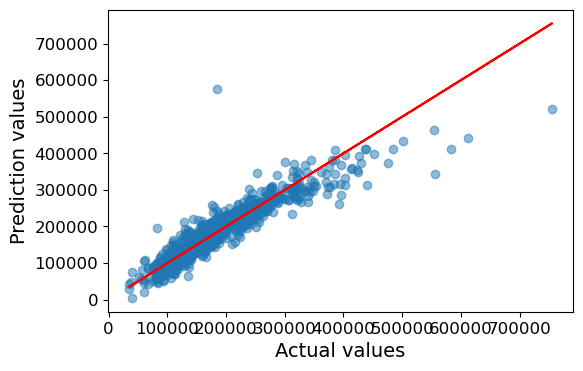


Solution 2: fill missing values based on other columns

Shape of training set: (1168, 59)
Shape of test set: (292, 59)
RMSE training: 29774.731628602054
Cross validation validation scores: [28558.89229863 26206.98921297 44132.10138258 29376.46430073
 26785.77369059]
Cross validation validation mean RMSE: 31012.04417710047


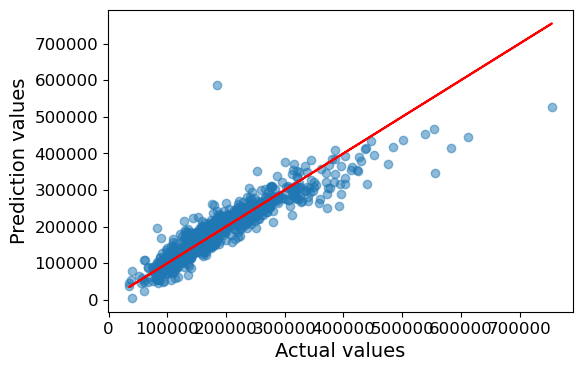

,Solution 1 Training RMSE,Solution 1 Cross validation RMSE,Solution 2 Training RMSE,Solution 2 Cross validation RMSE
0,29290.372731,30645.350614,29774.731629,31012.044177


In [10]:
# Training and cross validate with solution 1: delete rows with missing values
print("Solution 1: delete rows with missing values\n")
solution1_training_rmse, solution1_cv_rmse = training(training_set_solution_1, test_set_solution_1, pl_linear)
print()

# Training and cross validate with solution 2: fill missing values based on other columns
print("Solution 2: fill missing values based on other columns\n")
solution2_training_rmse, solution2_cv_rmse = training(training_set_solution_2, test_set_solution_2, pl_linear)

solutions_rmse_details = {
    "Solution 1 Training RMSE": [solution1_training_rmse],
    "Solution 1 Cross validation RMSE": [solution1_cv_rmse],
    "Solution 2 Training RMSE": [solution2_training_rmse],
    "Solution 2 Cross validation RMSE": [solution2_cv_rmse]
}

solutions_rmse_df = pd.DataFrame(solutions_rmse_details)
display(solutions_rmse_df)

## Task 2:
Write Python code to build a regression model from the training set that you applied the better solution in (1). Write the code to evaluate its performance on the test set that you applied the better solution in (1) with Root-Mean-Squared-Error (RMSE). RMSE shares similar motivation of the least square loss we taught in the lecture. Section 5 gives reference for the definition. Please try at least two regression models and compare their performances.

### 2.1: Write Python code to build a regression model from the training set that you applied the better solution in (1)

As in the result in the task 1, solution 1 (delete rows with missing values) has a smaller rmse in cross validation, so it is the better solution

Shape of training set: (1102, 59)
Shape of test set: (277, 59)
RMSE training: 29290.37273065618
Cross validation validation scores: [28305.48007486 24850.41530111 43689.23346094 28816.75613881
 27564.8680931 ]
Cross validation validation mean RMSE: 30645.35061376122


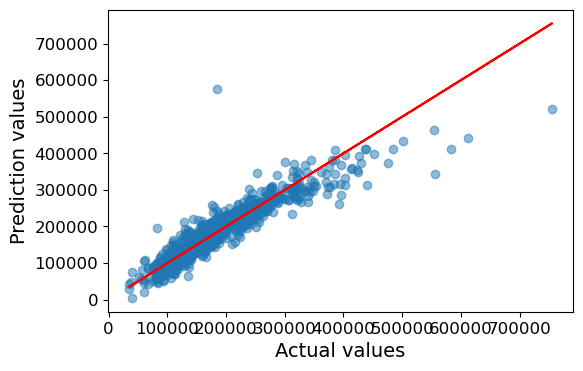

(29290.37273065618, 30645.35061376122)

In [11]:
# Training model with training set that applied solution 1
training(training_set_solution_1, test_set_solution_1, pl_linear)

### 2.2: Write the code to evaluate its performance on the test set that you applied the better solution in (1) with Root-Mean-Squared-Error (RMSE)

Shape of training set: (1102, 59)
Shape of test set: (277, 59)
RMSE test: 48476.697851538825


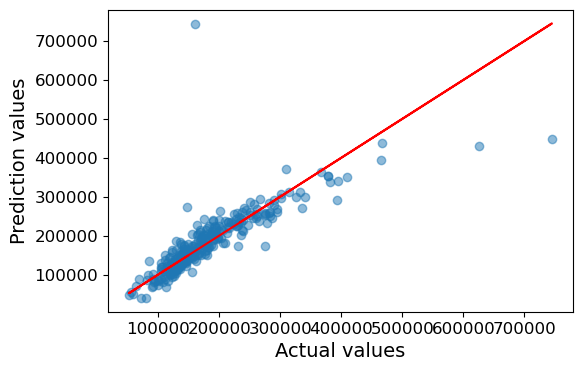

In [12]:
# Evaluate performance in the test set
# Set training = False because the model is trained
test(training_set_solution_1, test_set_solution_1, pl_linear, training = False)

### 2.3: Please try at least two regression models and compare their performances

Linear regression model was used in task 2.1, 2.2. I will use ridge regression model to compare with linear regression

In [13]:
from sklearn.linear_model import Ridge

# Create a pipeline using Ridge model
pl_ridge = Pipeline ([ 
    ('scaler',StandardScaler()),
    ('ridge', Ridge())
])

Training with Ridge regression
Shape of training set: (1102, 59)
Shape of test set: (277, 59)
RMSE training: 29281.198532522485
Cross validation validation scores: [28213.0612405  24834.95351764 43610.79231565 28831.550579
 27455.81245854]
Cross validation validation mean RMSE: 30589.23402226682


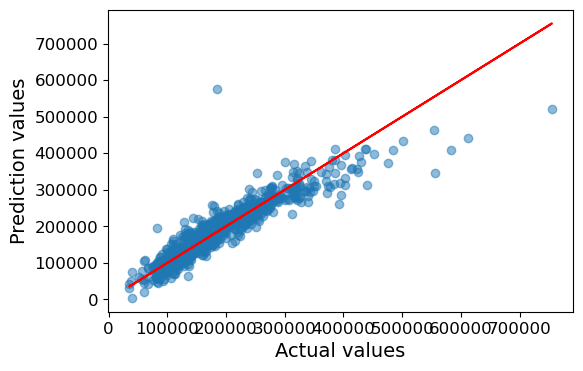

(29281.198532522485, 30589.23402226682)

In [14]:
print("Training with Ridge regression")
training(training_set_solution_1, test_set_solution_1, pl_ridge)

Evaluation performance of Ridge model in test set

Evaluation performance of Ridge model
Shape of training set: (1102, 59)
Shape of test set: (277, 59)
RMSE test: 48602.82289165306


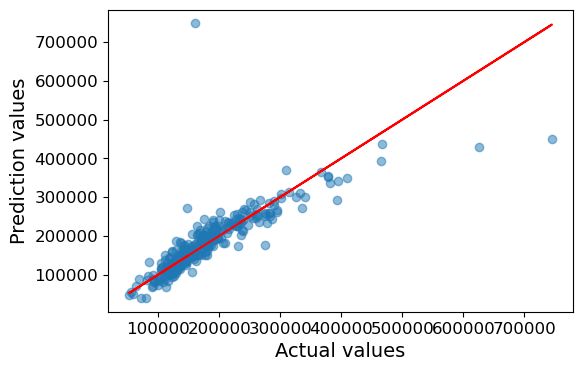

In [15]:
print("Evaluation performance of Ridge model")

test(training_set_solution_1, test_set_solution_1, pl_ridge, training = False)

## Task 3: 
There are 38 features provided for each house. Are all of the features used in your regression models? What’s the impact if removing some features? Please write your own code to compare different feature selections and justify your selection. At least two feature selections are investigated (full feature set, a subset of the features). The dataset is the modified ones that you applied the better solution in (1).

### 3.1. There are 38 features provided for each house. Are all of the features used in your regression models?

In the task 1 and 2, all of the features are used to train regression models

### 3.2. What’s the impact if removing some features? 

Fewer features result in a simpler model, reduced overfitting, a reduction in training time, and an improvement in accuracy.

1. Reduces overfitting: Less redundant data reduces the likelihood of making conclusions based on noise.
2. Improves accuracy: Less misleading data enhances modelling precision.
3. Reduces training time: Less data results in quicker algorithm training.

### 3.3. Please write your own code to compare different feature selections and justify your selection. At least two feature selections are investigated (full feature set, a subset of the features). The dataset is the modified ones that you applied the better solution in (1)

Full feature set is used in the task 1 and 2, in this task a subset of the feautures is investigated

### 3.3.1. Correlation

,Correlation to the target,Abs of correlation
SalePrice,1.000000,1.000000
OverallQual,0.792206,0.792206
GrLivArea,0.727463,0.727463
GarageCars,0.654479,0.654479
TotalBsmtSF,0.643649,0.643649
GarageArea,0.642608,0.642608
1stFlrSF,0.621144,0.621144
ExterQual_TA,-0.593505,0.593505
FullBath,0.561537,0.561537
TotRmsAbvGrd,0.559885,0.559885


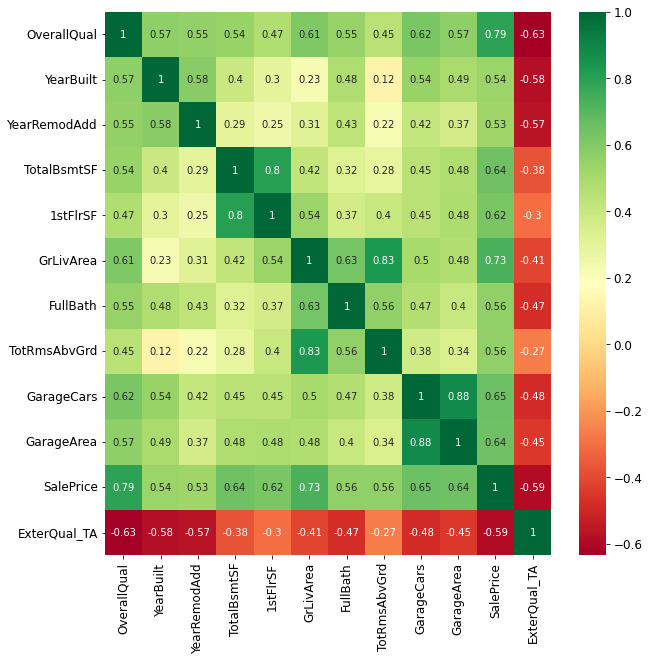

In [16]:
from pandas.plotting import scatter_matrix
import seaborn as sns

# 1. Calculate the correlation of each feature with the target
# Correlation matrix
corr_matrix = training_set_solution_1.corr()

# 2. Dataframe of correlation to the target
df_correlation = pd.DataFrame(corr_matrix.unstack().sort_values(ascending=False)['SalePrice'], columns=['Correlation to the target'])

# 3. Get top correlation feature which have absolute value of correlation of above 0.5
df_correlation['Abs of correlation'] = abs(df_correlation['Correlation to the target'])
df_correlation = df_correlation.sort_values(by='Abs of correlation', ascending=False, axis=0)
df_correlation = df_correlation.loc[df_correlation['Abs of correlation'] > 0.5]

display(df_correlation)

# 4. Show correlation between top features
top_corr_features = corr_matrix.index[abs(corr_matrix["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(training_set_solution_1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Select only features which have absolute of correlation of above 0.5

GarageCars and GarageArea are correlated with each other => remove GarageArea (keeping 'GarageCars' since its correlation with 'SalePrice' is higher).

GrLivArea and TotRmsAbvGrd are correlated with each other => remove TotRmsAbvGrd

TotalBsmtSF and 1stFlrSF are correlated with each other => remove 1stFlrSF

### 3.3.2. Feature selection

In [17]:
# List selected features with correlation above 0.5
list_selected_features = list(df_correlation.index)

# Remove GarageArea, TotRmsAbvGrd, 1stFlrSF
list_selected_features.remove('GarageArea')
list_selected_features.remove('TotRmsAbvGrd')
list_selected_features.remove('1stFlrSF')

print(list_selected_features)

training_subset = training_set_solution_1.copy()
test_subset = test_set_solution_1.copy()
for feature in training_subset.columns:
    if feature not in list_selected_features:
        training_subset = training_subset.drop(feature, axis=1)
        test_subset = test_subset.drop(feature, axis=1)

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'ExterQual_TA', 'FullBath', 'YearBuilt', 'YearRemodAdd']


In [18]:
display(training_subset.info())
display(training_subset.describe().T)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1167
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1102 non-null   float64
 1   YearBuilt     1102 non-null   float64
 2   YearRemodAdd  1102 non-null   int64  
 3   TotalBsmtSF   1102 non-null   int64  
 4   GrLivArea     1102 non-null   int64  
 5   FullBath      1102 non-null   int64  
 6   GarageCars    1102 non-null   int64  
 7   SalePrice     1102 non-null   int64  
 8   ExterQual_TA  1102 non-null   uint8  
dtypes: float64(2), int64(6), uint8(1)
memory usage: 78.6 KB


None

,count,mean,std,min,25%,50%,75%,max
OverallQual,1102.0,6.098004,1.374286,1.0,5.0,6.0,7.0,10.0
YearBuilt,1102.0,1971.102541,30.176403,1875.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1102.0,1984.895644,20.603409,1950.0,1966.0,1994.0,2004.0,2010.0
TotalBsmtSF,1102.0,1050.194192,417.525412,0.0,796.0,1004.0,1280.0,3206.0
GrLivArea,1102.0,1498.721416,504.367967,334.0,1120.0,1443.5,1765.5,4676.0
FullBath,1102.0,1.549909,0.548100,0.0,1.0,2.0,2.0,3.0
GarageCars,1102.0,1.750454,0.738444,0.0,1.0,2.0,2.0,4.0
SalePrice,1102.0,179901.731397,78252.531593,34900.0,129900.0,162250.0,213430.0,755000.0
ExterQual_TA,1102.0,0.620690,0.485436,0.0,0.0,1.0,1.0,1.0


### 3.3.3. Training and testing

Using linear regression

Training and testing with a subset of the features

Training and validation
Shape of training set: (1102, 9)
Shape of test set: (277, 9)
RMSE training: 34859.779194340204
Cross validation validation scores: [33375.74575948 30263.84837844 45151.98126947 34641.04986784
 31000.58975178]
Cross validation validation mean RMSE: 34886.64300540368


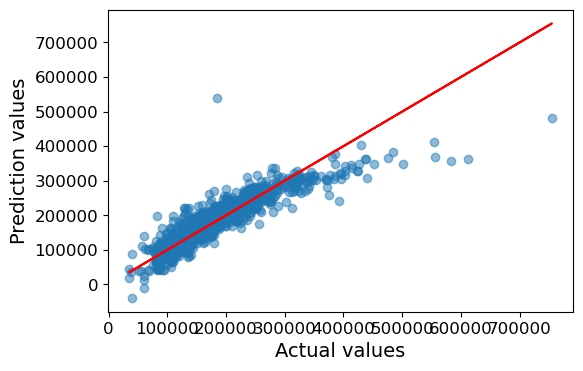


Evaluate performance
Shape of training set: (1102, 9)
Shape of test set: (277, 9)
RMSE test: 49465.37126102984


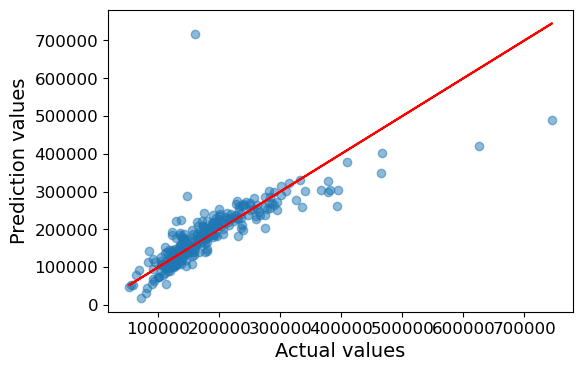

In [19]:
print("Training and testing with a subset of the features")
print()

# Training with sub set
print("Training and validation")
training(training_subset, test_subset, pl_linear)
print()

# Evaluate performance
print("Evaluate performance")
test(training_subset, test_subset, pl_linear)

Training and testing with full feature set

Training and validation
Shape of training set: (1102, 59)
Shape of test set: (277, 59)
RMSE training: 29290.37273065618
Cross validation validation scores: [28305.48007486 24850.41530111 43689.23346094 28816.75613881
 27564.8680931 ]
Cross validation validation mean RMSE: 30645.35061376122


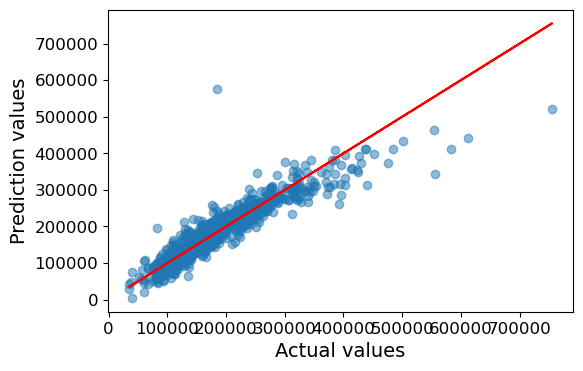


Evaluate performance
Shape of training set: (1102, 59)
Shape of test set: (277, 59)
RMSE test: 48476.697851538825


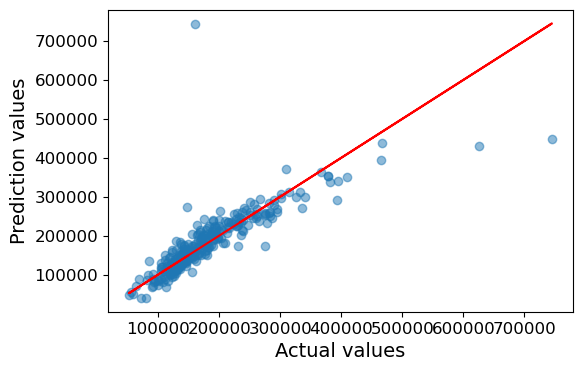

In [20]:
print("Training and testing with full feature set")
print()

# Training with full set
print("Training and validation")
training(training_set_solution_1, test_set_solution_1, pl_linear)
print()

# Evaluate performance
print("Evaluate performance")
test(training_set_solution_1, test_set_solution_1, pl_linear)